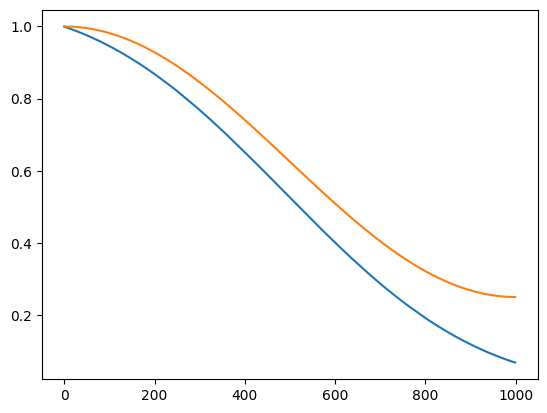

interactive(children=(IntSlider(value=500, description='timestep', max=1000), Output()), _dom_classes=('widget…

In [2]:
# plot a bimodal gaussian with fixed variance
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
alphas_cumprod = [0.9991, 0.9983, 0.9974, 0.9966, 0.9957, 0.9948, 0.9940, 0.9931, 0.9922,
        0.9913, 0.9904, 0.9895, 0.9886, 0.9877, 0.9868, 0.9859, 0.9850, 0.9841,
        0.9832, 0.9822, 0.9813, 0.9804, 0.9794, 0.9785, 0.9776, 0.9766, 0.9757,
        0.9747, 0.9737, 0.9728, 0.9718, 0.9708, 0.9698, 0.9689, 0.9679, 0.9669,
        0.9659, 0.9649, 0.9639, 0.9629, 0.9619, 0.9609, 0.9599, 0.9588, 0.9578,
        0.9568, 0.9557, 0.9547, 0.9537, 0.9526, 0.9516, 0.9505, 0.9495, 0.9484,
        0.9473, 0.9463, 0.9452, 0.9441, 0.9430, 0.9420, 0.9409, 0.9398, 0.9387,
        0.9376, 0.9365, 0.9354, 0.9343, 0.9332, 0.9320, 0.9309, 0.9298, 0.9287,
        0.9275, 0.9264, 0.9252, 0.9241, 0.9229, 0.9218, 0.9206, 0.9195, 0.9183,
        0.9171, 0.9160, 0.9148, 0.9136, 0.9124, 0.9112, 0.9100, 0.9089, 0.9077,
        0.9065, 0.9052, 0.9040, 0.9028, 0.9016, 0.9004, 0.8992, 0.8979, 0.8967,
        0.8955, 0.8942, 0.8930, 0.8917, 0.8905, 0.8892, 0.8880, 0.8867, 0.8854,
        0.8842, 0.8829, 0.8816, 0.8804, 0.8791, 0.8778, 0.8765, 0.8752, 0.8739,
        0.8726, 0.8713, 0.8700, 0.8687, 0.8674, 0.8661, 0.8647, 0.8634, 0.8621,
        0.8607, 0.8594, 0.8581, 0.8567, 0.8554, 0.8540, 0.8527, 0.8513, 0.8500,
        0.8486, 0.8473, 0.8459, 0.8445, 0.8431, 0.8418, 0.8404, 0.8390, 0.8376,
        0.8362, 0.8348, 0.8334, 0.8320, 0.8306, 0.8292, 0.8278, 0.8264, 0.8250,
        0.8236, 0.8221, 0.8207, 0.8193, 0.8179, 0.8164, 0.8150, 0.8136, 0.8121,
        0.8107, 0.8092, 0.8078, 0.8063, 0.8049, 0.8034, 0.8019, 0.8005, 0.7990,
        0.7975, 0.7960, 0.7946, 0.7931, 0.7916, 0.7901, 0.7886, 0.7871, 0.7856,
        0.7842, 0.7827, 0.7812, 0.7796, 0.7781, 0.7766, 0.7751, 0.7736, 0.7721,
        0.7706, 0.7690, 0.7675, 0.7660, 0.7645, 0.7629, 0.7614, 0.7599, 0.7583,
        0.7568, 0.7552, 0.7537, 0.7521, 0.7506, 0.7490, 0.7475, 0.7459, 0.7444,
        0.7428, 0.7412, 0.7397, 0.7381, 0.7365, 0.7350, 0.7334, 0.7318, 0.7302,
        0.7286, 0.7271, 0.7255, 0.7239, 0.7223, 0.7207, 0.7191, 0.7175, 0.7159,
        0.7143, 0.7127, 0.7111, 0.7095, 0.7079, 0.7063, 0.7047, 0.7031, 0.7015,
        0.6999, 0.6982, 0.6966, 0.6950, 0.6934, 0.6918, 0.6901, 0.6885, 0.6869,
        0.6852, 0.6836, 0.6820, 0.6803, 0.6787, 0.6771, 0.6754, 0.6738, 0.6722,
        0.6705, 0.6689, 0.6672, 0.6656, 0.6639, 0.6623, 0.6606, 0.6590, 0.6573,
        0.6557, 0.6540, 0.6524, 0.6507, 0.6490, 0.6474, 0.6457, 0.6441, 0.6424,
        0.6407, 0.6391, 0.6374, 0.6357, 0.6341, 0.6324, 0.6307, 0.6291, 0.6274,
        0.6257, 0.6241, 0.6224, 0.6207, 0.6190, 0.6174, 0.6157, 0.6140, 0.6123,
        0.6107, 0.6090, 0.6073, 0.6056, 0.6039, 0.6023, 0.6006, 0.5989, 0.5972,
        0.5955, 0.5939, 0.5922, 0.5905, 0.5888, 0.5871, 0.5855, 0.5838, 0.5821,
        0.5804, 0.5787, 0.5770, 0.5754, 0.5737, 0.5720, 0.5703, 0.5686, 0.5669,
        0.5652, 0.5636, 0.5619, 0.5602, 0.5585, 0.5568, 0.5551, 0.5535, 0.5518,
        0.5501, 0.5484, 0.5467, 0.5450, 0.5434, 0.5417, 0.5400, 0.5383, 0.5366,
        0.5350, 0.5333, 0.5316, 0.5299, 0.5282, 0.5266, 0.5249, 0.5232, 0.5215,
        0.5199, 0.5182, 0.5165, 0.5148, 0.5132, 0.5115, 0.5098, 0.5082, 0.5065,
        0.5048, 0.5032, 0.5015, 0.4998, 0.4982, 0.4965, 0.4948, 0.4932, 0.4915,
        0.4898, 0.4882, 0.4865, 0.4849, 0.4832, 0.4816, 0.4799, 0.4782, 0.4766,
        0.4749, 0.4733, 0.4716, 0.4700, 0.4684, 0.4667, 0.4651, 0.4634, 0.4618,
        0.4601, 0.4585, 0.4569, 0.4552, 0.4536, 0.4520, 0.4503, 0.4487, 0.4471,
        0.4455, 0.4438, 0.4422, 0.4406, 0.4390, 0.4374, 0.4357, 0.4341, 0.4325,
        0.4309, 0.4293, 0.4277, 0.4261, 0.4245, 0.4229, 0.4213, 0.4197, 0.4181,
        0.4165, 0.4149, 0.4133, 0.4117, 0.4101, 0.4086, 0.4070, 0.4054, 0.4038,
        0.4022, 0.4007, 0.3991, 0.3975, 0.3960, 0.3944, 0.3928, 0.3913, 0.3897,
        0.3882, 0.3866, 0.3850, 0.3835, 0.3819, 0.3804, 0.3789, 0.3773, 0.3758,
        0.3742, 0.3727, 0.3712, 0.3697, 0.3681, 0.3666, 0.3651, 0.3636, 0.3621,
        0.3605, 0.3590, 0.3575, 0.3560, 0.3545, 0.3530, 0.3515, 0.3500, 0.3485,
        0.3470, 0.3456, 0.3441, 0.3426, 0.3411, 0.3396, 0.3382, 0.3367, 0.3352,
        0.3338, 0.3323, 0.3308, 0.3294, 0.3279, 0.3265, 0.3250, 0.3236, 0.3222,
        0.3207, 0.3193, 0.3178, 0.3164, 0.3150, 0.3136, 0.3122, 0.3107, 0.3093,
        0.3079, 0.3065, 0.3051, 0.3037, 0.3023, 0.3009, 0.2995, 0.2981, 0.2967,
        0.2954, 0.2940, 0.2926, 0.2912, 0.2899, 0.2885, 0.2871, 0.2858, 0.2844,
        0.2831, 0.2817, 0.2804, 0.2790, 0.2777, 0.2763, 0.2750, 0.2737, 0.2723,
        0.2710, 0.2697, 0.2684, 0.2671, 0.2658, 0.2645, 0.2631, 0.2618, 0.2606,
        0.2593, 0.2580, 0.2567, 0.2554, 0.2541, 0.2528, 0.2516, 0.2503, 0.2490,
        0.2478, 0.2465, 0.2453, 0.2440, 0.2428, 0.2415, 0.2403, 0.2391, 0.2378,
        0.2366, 0.2354, 0.2341, 0.2329, 0.2317, 0.2305, 0.2293, 0.2281, 0.2269,
        0.2257, 0.2245, 0.2233, 0.2221, 0.2209, 0.2198, 0.2186, 0.2174, 0.2163,
        0.2151, 0.2139, 0.2128, 0.2116, 0.2105, 0.2093, 0.2082, 0.2071, 0.2059,
        0.2048, 0.2037, 0.2026, 0.2014, 0.2003, 0.1992, 0.1981, 0.1970, 0.1959,
        0.1948, 0.1937, 0.1926, 0.1915, 0.1905, 0.1894, 0.1883, 0.1872, 0.1862,
        0.1851, 0.1841, 0.1830, 0.1820, 0.1809, 0.1799, 0.1788, 0.1778, 0.1768,
        0.1757, 0.1747, 0.1737, 0.1727, 0.1717, 0.1707, 0.1696, 0.1686, 0.1677,
        0.1667, 0.1657, 0.1647, 0.1637, 0.1627, 0.1618, 0.1608, 0.1598, 0.1589,
        0.1579, 0.1569, 0.1560, 0.1550, 0.1541, 0.1532, 0.1522, 0.1513, 0.1504,
        0.1494, 0.1485, 0.1476, 0.1467, 0.1458, 0.1449, 0.1440, 0.1431, 0.1422,
        0.1413, 0.1404, 0.1395, 0.1386, 0.1378, 0.1369, 0.1360, 0.1352, 0.1343,
        0.1334, 0.1326, 0.1317, 0.1309, 0.1301, 0.1292, 0.1284, 0.1276, 0.1267,
        0.1259, 0.1251, 0.1243, 0.1235, 0.1227, 0.1219, 0.1211, 0.1203, 0.1195,
        0.1187, 0.1179, 0.1171, 0.1163, 0.1155, 0.1148, 0.1140, 0.1132, 0.1125,
        0.1117, 0.1110, 0.1102, 0.1095, 0.1087, 0.1080, 0.1073, 0.1065, 0.1058,
        0.1051, 0.1044, 0.1036, 0.1029, 0.1022, 0.1015, 0.1008, 0.1001, 0.0994,
        0.0987, 0.0980, 0.0973, 0.0967, 0.0960, 0.0953, 0.0946, 0.0940, 0.0933,
        0.0926, 0.0920, 0.0913, 0.0907, 0.0900, 0.0894, 0.0887, 0.0881, 0.0875,
        0.0868, 0.0862, 0.0856, 0.0850, 0.0844, 0.0837, 0.0831, 0.0825, 0.0819,
        0.0813, 0.0807, 0.0801, 0.0795, 0.0789, 0.0784, 0.0778, 0.0772, 0.0766,
        0.0761, 0.0755, 0.0749, 0.0744, 0.0738, 0.0732, 0.0727, 0.0721, 0.0716,
        0.0711, 0.0705, 0.0700, 0.0694, 0.0689, 0.0684, 0.0679, 0.0673, 0.0668,
        0.0663, 0.0658, 0.0653, 0.0648, 0.0643, 0.0638, 0.0633, 0.0628, 0.0623,
        0.0618, 0.0613, 0.0608, 0.0604, 0.0599, 0.0594, 0.0589, 0.0585, 0.0580,
        0.0575, 0.0571, 0.0566, 0.0562, 0.0557, 0.0553, 0.0548, 0.0544, 0.0539,
        0.0535, 0.0531, 0.0526, 0.0522, 0.0518, 0.0514, 0.0509, 0.0505, 0.0501,
        0.0497, 0.0493, 0.0489, 0.0485, 0.0481, 0.0477, 0.0473, 0.0469, 0.0465,
        0.0461, 0.0457, 0.0453, 0.0450, 0.0446, 0.0442, 0.0438, 0.0435, 0.0431,
        0.0427, 0.0424, 0.0420, 0.0416, 0.0413, 0.0409, 0.0406, 0.0402, 0.0399,
        0.0395, 0.0392, 0.0389, 0.0385, 0.0382, 0.0379, 0.0375, 0.0372, 0.0369,
        0.0365, 0.0362, 0.0359, 0.0356, 0.0353, 0.0350, 0.0347, 0.0343, 0.0340,
        0.0337, 0.0334, 0.0331, 0.0328, 0.0325, 0.0323, 0.0320, 0.0317, 0.0314,
        0.0311, 0.0308, 0.0305, 0.0303, 0.0300, 0.0297, 0.0295, 0.0292, 0.0289,
        0.0286, 0.0284, 0.0281, 0.0279, 0.0276, 0.0274, 0.0271, 0.0268, 0.0266,
        0.0264, 0.0261, 0.0259, 0.0256, 0.0254, 0.0251, 0.0249, 0.0247, 0.0244,
        0.0242, 0.0240, 0.0237, 0.0235, 0.0233, 0.0231, 0.0229, 0.0226, 0.0224,
        0.0222, 0.0220, 0.0218, 0.0216, 0.0214, 0.0212, 0.0210, 0.0207, 0.0205,
        0.0203, 0.0201, 0.0200, 0.0198, 0.0196, 0.0194, 0.0192, 0.0190, 0.0188,
        0.0186, 0.0184, 0.0182, 0.0181, 0.0179, 0.0177, 0.0175, 0.0174, 0.0172,
        0.0170, 0.0168, 0.0167, 0.0165, 0.0163, 0.0162, 0.0160, 0.0158, 0.0157,
        0.0155, 0.0154, 0.0152, 0.0151, 0.0149, 0.0147, 0.0146, 0.0144, 0.0143,
        0.0142, 0.0140, 0.0139, 0.0137, 0.0136, 0.0134, 0.0133, 0.0132, 0.0130,
        0.0129, 0.0127, 0.0126, 0.0125, 0.0123, 0.0122, 0.0121, 0.0120, 0.0118,
        0.0117, 0.0116, 0.0115, 0.0113, 0.0112, 0.0111, 0.0110, 0.0109, 0.0107,
        0.0106, 0.0105, 0.0104, 0.0103, 0.0102, 0.0101, 0.0100, 0.0098, 0.0097,
        0.0096, 0.0095, 0.0094, 0.0093, 0.0092, 0.0091, 0.0090, 0.0089, 0.0088,
        0.0087, 0.0086, 0.0085, 0.0084, 0.0083, 0.0082, 0.0082, 0.0081, 0.0080,
        0.0079, 0.0078, 0.0077, 0.0076, 0.0075, 0.0074, 0.0074, 0.0073, 0.0072,
        0.0071, 0.0070, 0.0070, 0.0069, 0.0068, 0.0067, 0.0066, 0.0066, 0.0065,
        0.0064, 0.0063, 0.0063, 0.0062, 0.0061, 0.0061, 0.0060, 0.0059, 0.0058,
        0.0058, 0.0057, 0.0056, 0.0056, 0.0055, 0.0054, 0.0054, 0.0053, 0.0053,
        0.0052, 0.0051, 0.0051, 0.0050, 0.0049, 0.0049, 0.0048, 0.0048, 0.0047,
        0.0047]

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
sqrt_alpha_prod = np.array(alphas_cumprod) ** 0.5
plt.plot(sqrt_alpha_prod)
plt.plot(np.cos(np.arange(0, 1000, 1) / 1000 * np.pi) * 0.375 + 0.625)


@interact(timestep=(0, 1000, 1))
def visualize(timestep):
    sqrt_alpha_prod = alphas_cumprod[timestep] ** 0.5
    sqrt_one_minus_alpha_prod = (1 - alphas_cumprod[timestep]) ** 0.5


    x_vals = np.linspace(-5, 5, 100)
    cov = sqrt_one_minus_alpha_prod **2
    print(cov)
    means = np.array([0, 1]) * sqrt_alpha_prod # p(x|y)
    y1 = norm.pdf(x_vals, means[0], cov) * 0.7
    y2 = norm.pdf(x_vals, means[1], cov) * 0.3
    p = y1 + y2
    # plt.plot(x_vals, q)


    # plot a same fixed variance gaussian


    # compute KL
    def KL(p, q):
        return np.sum(p * np.log(p / (q + 1e-6) + 1e-6))

    kls = []
    for mean in np.linspace(-5, 5, 100):
        q = norm.pdf(x_vals, mean, cov) # p(z_t|y)
        kls.append(KL(q, p))
    # print(np.argmin(np.array(kls)))
    # print(np.linspace(-5, 5, 100)[np.argmin(np.array(kls))])
    plt.plot(x_vals, kls / max(kls))
    plt.plot(x_vals, p / max(p))
    plt.scatter(means, [p[np.round(mean * 10).astype(int) + 50] / max(p) for mean in means], color="red", marker="x")
    plt.legend(["kl", "p(moG)"])

    # plt.show(block=False)
    # move the unimodal gaussian, plot KL div for each point




Explanation:

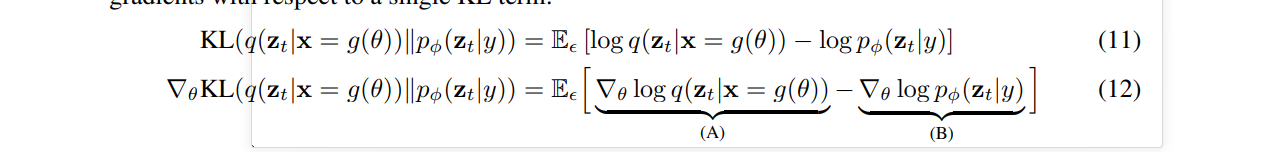

First term in RHS of first equation is just entropy of gaussian, so it is constant w.r.t to the mean, therefore first term in RHS of second equation is 0. Second term on RHS of second equation is the score function. So, score density distillation is equivalent to minimizing this KL thing.

In this simplified analysis, we assume the $g(x)$ term in $q(z_t|x=g(\theta))$ is simply a gaussian distribution $\mathcal{N}(z_t|x, \sigma_t^2)$, and $p_\phi(z_t|y)$ is simply a mixture of gaussian, with two means $x_1$ and $x_2$

We plot two things: the yellow curve is the pdf of  $p_\phi(z_t|y)$, and the blue curve's $x$ axis is $\hat{x}$, i.e. the value that is being optimized, while the blue curve's $y$ axis is $KL(q(z_t|\hat{x})||p_\phi(z_t|y))$. As we drag the slider we vary $t$. Since the SDS process is optimizing $\hat{x}$ with the blue curve as its loss function, we hope the the minima of the blue curve coincides with the peaks of yellow curve when we optimize. Therefore, we choose to anneal $t$ from 1000 to 0, since at $t=0$ these two things coincide.

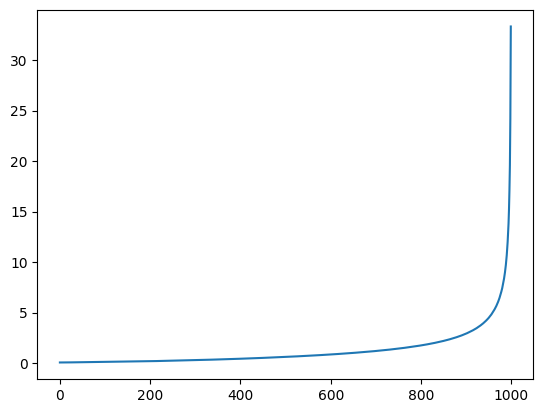

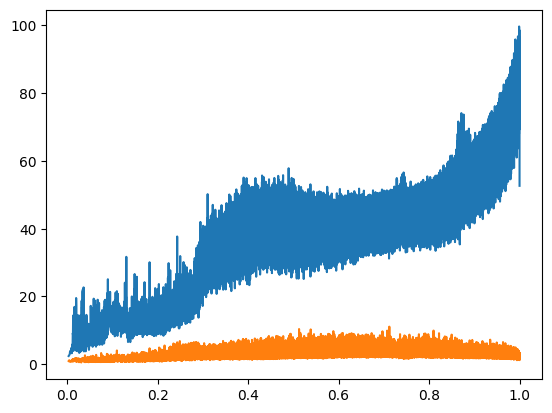

In [2]:
# w = [ 50 / (0.15 * ((1 - alphas_cumprod[t]) ** 0.5 / alphas_cumprod[t] ** 0.5)) * (1 - alphas_cumprod[t]) ** 0.5 for t in range(999, -1, -1)]
sqrt_alpha = np.array(alphas_cumprod[::-1]) ** 0.5
sqrt_one_minus_alpha = (1 - np.array(alphas_cumprod[::-1])) ** 0.5
# plt.plot(sqrt_alpha)
# plt.plot(1 / sqrt_one_minus_alpha)
plt.plot(sqrt_alpha / sqrt_one_minus_alpha)
# plt.plot(np.minimum(np.array(alphas_cumprod)[::-1] / (1 - np.array(alphas_cumprod)[::-1]), 1))
# plt.plot(1 / np.array(alphas_cumprod)[::-1] ** 0.5)

percentage = []
score_norm = []
guidance_norm = []
for line in open("score_norm_5.txt", "r").readlines():
    percentage.append(float(line.split(",")[0]))
    score_norm.append(float(line.split(",")[1]))
    guidance_norm.append(float(line.split(",")[2]))

plt.figure()
plt.plot(percentage, score_norm)
plt.plot(percentage, guidance_norm)

(2000,)


(array([ 16.,  75., 179., 424., 519., 449., 226.,  94.,  15.,   3.]),
 array([-0.04874613, -0.03804837, -0.02735061, -0.01665285, -0.00595509,
         0.00474267,  0.01544042,  0.02613818,  0.03683594,  0.0475337 ,
         0.05823146]),
 <BarContainer object of 10 artists>)

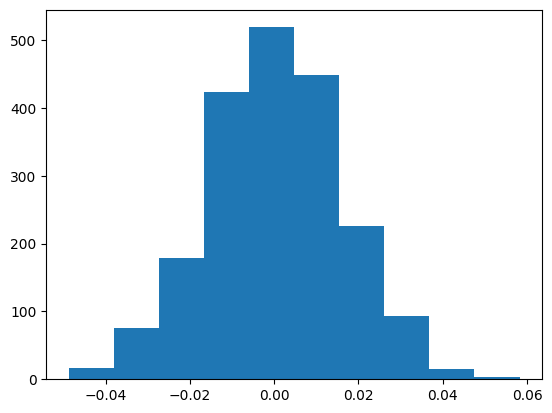

In [21]:
vec1 = np.random.randn(64 * 64)
vec2 = np.random.randn(2000, 64 * 64)
inner = (vec1 * vec2).sum(-1) / np.linalg.norm(vec1) / np.linalg.norm(vec2, axis=-1)
print(inner.shape)
plt.hist(inner)


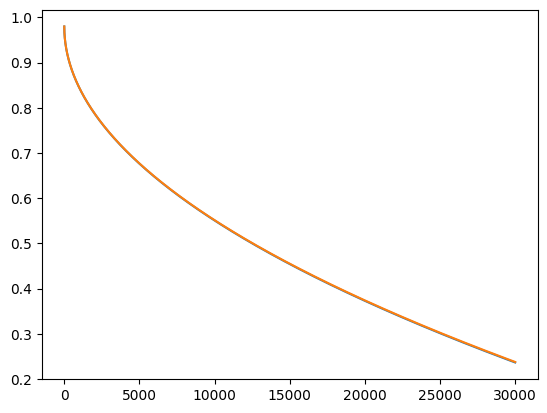

In [12]:
import numpy as np
import matplotlib.pyplot as plt
it = np.arange(0, 30000, 1)
t1 = 0.02 + 0.96 * (1 - np.sqrt(it / 50000))
t2 = 0.25 + 0.73 * (1 - np.sqrt(it / 29000))
plt.plot(it, t1)
plt.plot(it, t2)

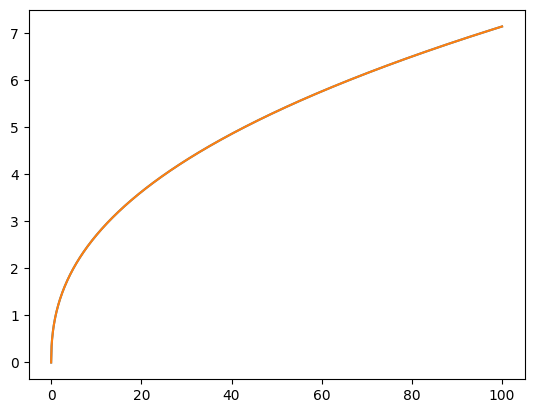

In [7]:
import torch
import matplotlib.pyplot as plt
def _rgb_to_srgb(f: torch.Tensor) -> torch.Tensor:
    return torch.where(f <= 0.0031308, f * 12.92, torch.pow(torch.clamp(f, 0.0031308), 1.0/2.4)*1.055 - 0.055)
def _tonemap_srgb(f):
    return torch.where(f > 0.0031308, torch.pow(torch.clamp(f, min=0.0031308), 1.0/2.4)*1.055 - 0.055, 12.92*f)

rgb = torch.linspace(0, 100, 1000)
srgb = _tonemap_srgb(rgb)
srgb2 = _rgb_to_srgb(rgb)
plt.plot(rgb, srgb)
plt.plot(rgb, srgb2)